In [222]:
#setup - constants & imports
path = 'C:/Users/mark/Documents/GitHub/honours/dev/package/'

import sys; sys.path.append(path)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import rcParams
import datetime

%matplotlib inline
rcParams['figure.figsize'] = 20,6

In [223]:
#load data 
import analysis.dataPreparer as dp
df = dp.export_dataframe(path+"analysis/output/combo.db", "combo")

logManager - INFO - export_dataframe | Started
logManager - INFO - export_dataframe | Passed | 57.34


In [224]:
#constrain data
df = df.loc[df['company_operating_bool'] == 1]
df = df.loc[df['company_founded_date'] > 0]
#df = df.loc[df['offices_headquarters_country_dummy_usa'] == 1]
#df = df.loc[df['company_founded_date'] > 1262275200]

In [225]:
#Show an overview of our data
df.describe()

,industry_category_main_dummy_ecommerce,industry_category_main_dummy_games_video,industry_category_main_dummy_other,industry_category_main_dummy_software,industry_category_main_dummy_web,industry_categories_list_ecommerce,industry_categories_list_mobile,industry_categories_list_social,industry_categories_list_social-media,industry_categories_list_software,...,outcome_funding_total_usd_number,outcome_survival_duration,outcome_acquisitions_valuation_number,outcome_acquisition_duration,outcome_raise_a_bool,outcome_raise_b_bool,outcome_raise_cplus_bool,outcome_ipo_valuation_number,outcome_ipo_duration,outcome_exit_duration
count,79689.000000,79689.000000,79689.000000,79689.000000,79689.000000,79689.000000,79689.000000,79689.000000,79689.000000,79689.000000,...,7.968900e+04,7.410000e+02,7.968900e+04,3.194000e+03,23238.000000,23238.000000,23238.0,7.968900e+04,8.030000e+02,1.000000e+02
mean,0.084516,0.053031,0.090853,0.158240,0.133707,0.024483,0.047271,0.023529,0.026114,0.024219,...,5.967308e+06,1.177205e+08,4.422766e+06,2.851352e+08,0.173423,0.038773,0.0,2.495201e+06,2.980161e+08,5.209116e+08
std,0.278162,0.224097,0.287402,0.364968,0.340340,0.154543,0.212220,0.151577,0.159475,0.153730,...,6.395718e+07,1.229652e+08,1.665326e+08,2.149616e+08,0.378621,0.193057,0.0,1.069565e+08,2.930774e+08,2.721610e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-1.474502e+09,0.000000e+00,-3.599424e+08,0.000000,0.000000,0.0,0.000000e+00,-9.867744e+08,1.014336e+08
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,5.529600e+07,0.000000e+00,1.346976e+08,0.000000,0.000000,0.0,0.000000e+00,1.446336e+08,3.183840e+08
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,9.918720e+07,0.000000e+00,2.289600e+08,0.000000,0.000000,0.0,0.000000e+00,2.622240e+08,4.580064e+08
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.200000e+04,1.534464e+08,0.000000e+00,3.791664e+08,0.000000,0.000000,0.0,0.000000e+00,4.074624e+08,6.892992e+08
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.145745e+10,1.230077e+09,2.330000e+10,3.353875e+09,1.000000,1.000000,0.0,1.646105e+10,3.409171e+09,1.182557e+09


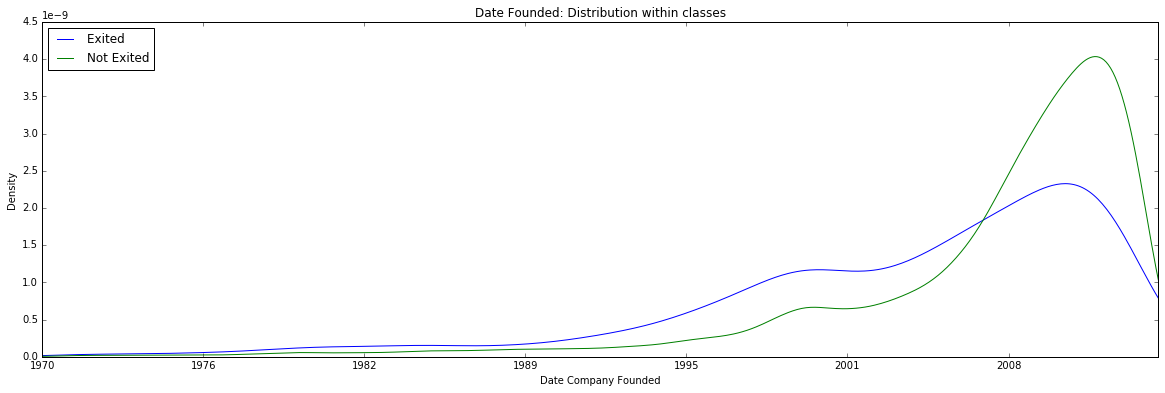

In [226]:
#Explore date company founded
plt.figure()
fig, ax = plt.subplots()
df.company_founded_date[df.outcome_exit_bool == 1].plot(kind='kde')    
df.company_founded_date[df.outcome_exit_bool == 0].plot(kind='kde') 
plt.xlim(xmin=0,xmax=int(datetime.datetime(2013,12,1,0,0).timestamp()))
xticks = ax.get_xticks()
xlabels = [datetime.datetime.fromtimestamp(int(x)).strftime('%Y') for x in xticks]
ax.set_xticklabels(xlabels)
plt.xlabel("Date Company Founded")    
plt.title("Date Founded: Distribution within classes")
plt.legend(('Exited ', 'Not Exited'),loc='best') 

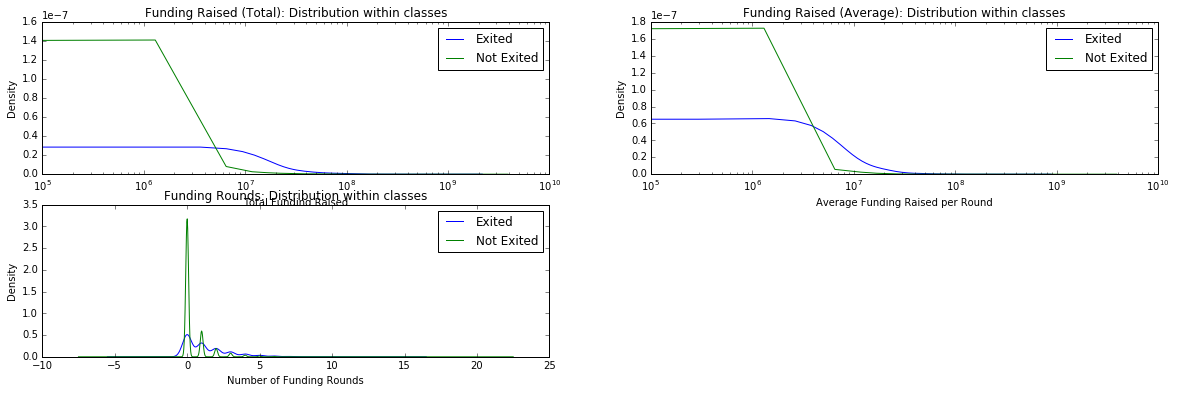

In [227]:
#Explore total funding raised
fig = plt.figure()

#Total Funding Raised
ax1 = fig.add_subplot(221)
df.funding_raised_total_value_number[df.outcome_exit_bool == 1].plot(kind='kde')    
df.funding_raised_total_value_number[df.outcome_exit_bool == 0].plot(kind='kde') 
ax1.set_xscale('log')
plt.xlabel("Total Funding Raised")    
plt.title("Funding Raised (Total): Distribution within classes")
plt.legend(('Exited', 'Not Exited'),loc='best') 

#Average Funding Raised
ax2 = fig.add_subplot(222)
df.funding_raise_average_number[df.outcome_exit_bool == 1].plot(kind='kde')    
df.funding_raise_average_number[df.outcome_exit_bool == 0].plot(kind='kde') 
ax2.set_xscale('log')
plt.xlabel("Average Funding Raised per Round")    
plt.title("Funding Raised (Average): Distribution within classes")
plt.legend(('Exited', 'Not Exited'),loc='best') 

#Number of Funding Rounds
ax3 = fig.add_subplot(223)
df.funding_rounds_number[df.outcome_exit_bool == 1].plot(kind='kde')    
df.funding_rounds_number[df.outcome_exit_bool == 0].plot(kind='kde') 
plt.xlabel("Number of Funding Rounds")    
plt.title("Funding Rounds: Distribution within classes")
plt.legend(('Exited', 'Not Exited'),loc='best') 


In [228]:
#Handle null values
nulls.sort_values(inplace=True,ascending=False)
#df.replace(np.nan, 0, inplace=True)
#df = df[df.columns[df.isnull().sum() == 0]]
#df[nulls == 0]
#df.columns[]

In [229]:
#Select label
chosen = "outcome_exit_bool"
y = df[chosen]

In [230]:
#Select features
drops = df[[col for col in list(df) if col.startswith(("key","outcome","index"))]]
X = df.drop(list(drops), axis=1)
list(X)

['industry_category_main_dummy_ecommerce',
 'industry_category_main_dummy_games_video',
 'industry_category_main_dummy_other',
 'industry_category_main_dummy_software',
 'industry_category_main_dummy_web',
 'industry_categories_list_ecommerce',
 'industry_categories_list_mobile',
 'industry_categories_list_social',
 'industry_categories_list_social-media',
 'industry_categories_list_software',
 'company_operating_bool',
 'company_acquired_bool',
 'social_website_bool',
 'social_twitter_bool',
 'company_founded_date',
 'company_founded_date_SP500_number',
 'company_survival_date',
 'company_survival_date_SP500_number',
 'offices_headquarters_country_dummy_can',
 'offices_headquarters_country_dummy_deu',
 'offices_headquarters_country_dummy_gbr',
 'offices_headquarters_country_dummy_ind',
 'offices_headquarters_country_dummy_usa',
 'offices_headquarters_state_dummy_ca',
 'offices_headquarters_state_dummy_fl',
 'offices_headquarters_state_dummy_ma',
 'offices_headquarters_state_dummy_ny',

In [231]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [232]:
#preamble
print('\n','-'*20)
print("Classification Results")
print("\n")
print("Features Date:", "December 2013")
print("Labels Date:", "September 2016")
print("Selected Label:", chosen)
#print("Selected Classifier:", "Random Forest")


 --------------------
Classification Results


Features Date: December 2013
Labels Date: September 2016
Selected Label: outcome_exit_bool
Selected Classifier: Random Forest


In [233]:
#Classification
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=10)
RF_fit = RF.fit(X_train, y_train)
RF_pred = RF_fit.predict(X_test)
RF_prob = RF_fit.predict_proba(X_test)

In [234]:
## Feature importances
print('\n')
print('Feature Importances (Top 10):')
zipped = list(zip(list(X), RF_fit.feature_importances_))
zipped.sort(key = lambda t: t[1],reverse=True)
for i, j in zipped[:10]: 
    print("{}: {:.4f}".format(i, j))



Feature Importances (Top 10):
company_founded_date: 0.0806
funding_raise_average_number: 0.0306
company_founded_date_SP500_number: 0.0305
people_directors_jobs_all_total_number: 0.0221
people_directors_degrees_total_number: 0.0221
funding_first_date: 0.0212
funding_raised_total_value_number: 0.0209
people_founders_jobs_all_total_number: 0.0196
people_founders_jobs_all_average_number: 0.0195
from_funding_first_date_to_company_founded_date_duration: 0.0189


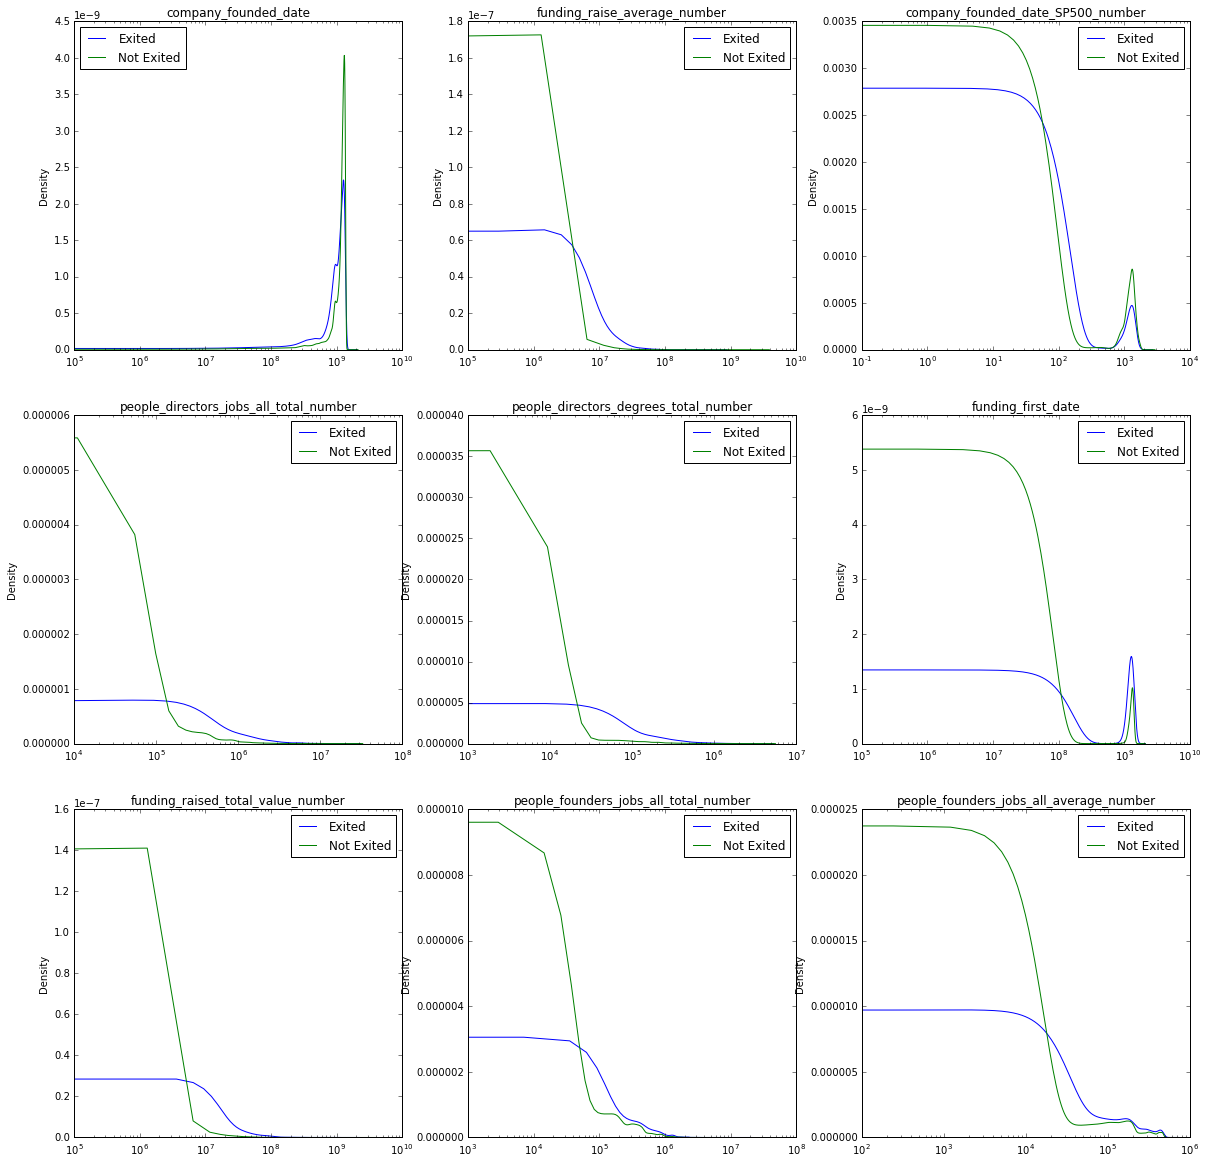

In [235]:
#Plot most important features
fig = plt.figure(figsize=(20,20))

n = 9
sr_n = n**(1.0/2)

for x, (i, j) in enumerate(zipped[0:n]):
    ax = fig.add_subplot(sr_n, sr_n, x+1)
    df[i][df.outcome_exit_bool == 1].plot(kind='kde')    
    df[i][df.outcome_exit_bool == 0].plot(kind='kde')
    ax.set_xscale('log')
    plt.title(i)
    plt.legend(('Exited', 'Not Exited'),loc='best') 

In [236]:
#Test results
from sklearn import metrics
mc_scorer = metrics.make_scorer(metrics.matthews_corrcoef)
classification_report = metrics.classification_report(y_test, RF_pred)
confusion_matrix = metrics.confusion_matrix(y_test, RF_pred)
test_accuracy = RF_fit.score(X_test, y_test)
test_matthews = metrics.matthews_corrcoef(y_test, RF_pred)
print('\nClassification Report:', classification_report)
print('Confusion Matrix:', confusion_matrix)
print('Test Accuracy:', test_accuracy)
print('Test Matthews corrcoef', test_matthews)


Classification Report:              precision    recall  f1-score   support

          0       0.95      0.99      0.97     25055
          1       0.31      0.05      0.08      1243

avg / total       0.92      0.95      0.93     26298

Confusion Matrix: [[24927   128]
 [ 1185    58]]
Test Accuracy: 0.95007224884
Test Matthews corrcoef 0.105221340502


In [237]:
#Cross-fold validation
from sklearn.model_selection import KFold, cross_val_score
RF_scores = cross_val_score(RF, X, y, cv=5, scoring=mc_scorer)
print('\nCross-validation scores:', RF_scores)
print("CV Avg Matthews CC: %0.2f (+/- %0.2f)" % (RF_scores.mean(), RF_scores.std() * 2))
print('-'*20, '\n')


Cross-validation scores: [ 0.12393166  0.09248256  0.09964446  0.10335574  0.07172041]
CV Avg Matthews CC: 0.10 (+/- 0.03)
-------------------- 



C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


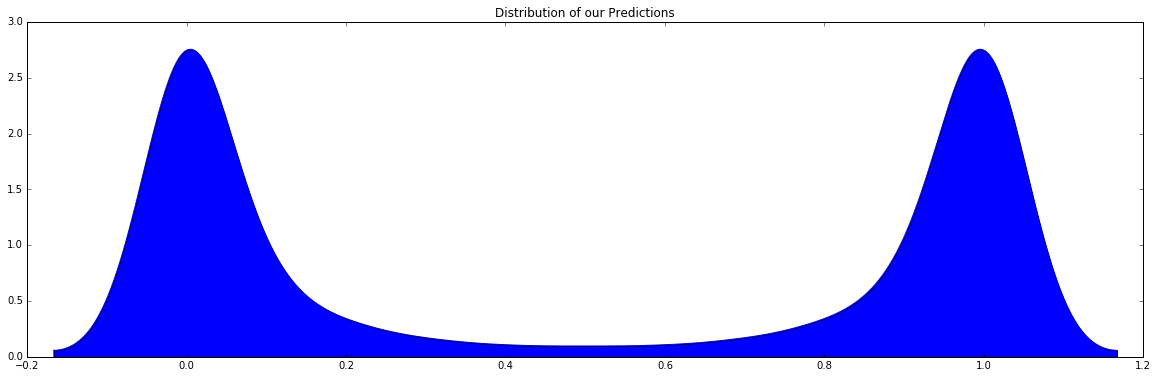

In [238]:
#Plot results
from statsmodels.nonparametric.kde import KDEUnivariate

kde_res = KDEUnivariate(RF_prob)
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density)
plt.title("Distribution of our Predictions")